In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

DOWNLOAD THE DATASETS OF ABOUT 845 CRICKET MATCHES FROM: https://cricsheet.org/downloads/ipl_csv2.zip

In [180]:
import glob

path = r'E:/IPL/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    dfs = pd.read_csv(filename, index_col=None, header=0)
    li.append(dfs)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.drop(['start_date','wides', 'noballs', 'byes', 'legbyes', 'other_wicket_type',
       'other_player_dismissed','penalty','wicket_type','player_dismissed','season','striker','non_striker','bowler'],axis = 1)
df['venue'] = df['venue'].replace(['MA Chidambaram Stadium, Chepauk, Chennai', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk'], 'MA Chidambaram Stadium, Chennai')
df['venue'] = df['venue'].replace(['Wankhede Stadium'], 'Wankhede Stadium, Mumbai')
df


C:\Users\Pradeep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras
0,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
1,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.2,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
2,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.3,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0
3,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.4,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
4,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.5,Sunrisers Hyderabad,Royal Challengers Bangalore,0,2
...,...,...,...,...,...,...,...,...
401323,1254086,"Narendra Modi Stadium, Ahmedabad",2,17.2,Delhi Capitals,Punjab Kings,6,0
401324,1254086,"Narendra Modi Stadium, Ahmedabad",2,17.3,Delhi Capitals,Punjab Kings,6,0
401325,1254086,"Narendra Modi Stadium, Ahmedabad",2,17.4,Delhi Capitals,Punjab Kings,4,0
401326,1254086,"Narendra Modi Stadium, Ahmedabad",2,17.5,Delhi Capitals,Punjab Kings,0,1


In [181]:
b = []
for ball in df['ball']:
    if ball<6.0:
        b.append(ball)
df = df[df['ball'].isin(b)]
df.reset_index(drop = True)

,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras
0,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.1,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
1,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.2,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
2,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.3,Sunrisers Hyderabad,Royal Challengers Bangalore,4,0
3,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.4,Sunrisers Hyderabad,Royal Challengers Bangalore,0,0
4,1082591,"Rajiv Gandhi International Stadium, Uppal",1,0.5,Sunrisers Hyderabad,Royal Challengers Bangalore,0,2
...,...,...,...,...,...,...,...,...
126489,1254086,"Narendra Modi Stadium, Ahmedabad",2,5.2,Delhi Capitals,Punjab Kings,0,0
126490,1254086,"Narendra Modi Stadium, Ahmedabad",2,5.3,Delhi Capitals,Punjab Kings,6,0
126491,1254086,"Narendra Modi Stadium, Ahmedabad",2,5.4,Delhi Capitals,Punjab Kings,4,0
126492,1254086,"Narendra Modi Stadium, Ahmedabad",2,5.5,Delhi Capitals,Punjab Kings,1,0


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['match_id'] = le.fit_transform(df['match_id'])
df = df.reset_index(drop = True)
df['net_runs'] = df['runs_off_bat']+df['extras']
df = df.drop(['runs_off_bat','extras'],axis = 1)

<ipython-input-182-79383e19c6c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_id'] = le.fit_transform(df['match_id'])


In [183]:
innings_split = df.groupby('innings')
dfi1 = innings_split.get_group(1)
dfi2 = innings_split.get_group(2)
dfi1

,match_id,venue,innings,ball,batting_team,bowling_team,net_runs
0,577,"Rajiv Gandhi International Stadium, Uppal",1,0.1,Sunrisers Hyderabad,Royal Challengers Bangalore,0
1,577,"Rajiv Gandhi International Stadium, Uppal",1,0.2,Sunrisers Hyderabad,Royal Challengers Bangalore,0
2,577,"Rajiv Gandhi International Stadium, Uppal",1,0.3,Sunrisers Hyderabad,Royal Challengers Bangalore,4
3,577,"Rajiv Gandhi International Stadium, Uppal",1,0.4,Sunrisers Hyderabad,Royal Challengers Bangalore,0
4,577,"Rajiv Gandhi International Stadium, Uppal",1,0.5,Sunrisers Hyderabad,Royal Challengers Bangalore,2
...,...,...,...,...,...,...,...
126452,844,"Narendra Modi Stadium, Ahmedabad",1,5.2,Punjab Kings,Delhi Capitals,0
126453,844,"Narendra Modi Stadium, Ahmedabad",1,5.3,Punjab Kings,Delhi Capitals,1
126454,844,"Narendra Modi Stadium, Ahmedabad",1,5.4,Punjab Kings,Delhi Capitals,2
126455,844,"Narendra Modi Stadium, Ahmedabad",1,5.5,Punjab Kings,Delhi Capitals,1


In [184]:
match_split1 = dfi1.groupby('match_id')
match_split2 = dfi2.groupby('match_id')
ms1 = []
ms2 = []
for match1,matchdf1 in match_split1:
    matchdf1 = matchdf1.drop_duplicates(subset = 'ball')
    matchdf1['6_over_score'] = matchdf1['net_runs'].sum()
    ms1.append(matchdf1)
matchdf1i = pd.concat(ms1)
for match2,matchdf2 in match_split2:
    matchdf2 = matchdf2.drop_duplicates(subset = 'ball')
    matchdf2['6_over_score'] = matchdf2['net_runs'].sum()
    ms2.append(matchdf2)
matchdf2i = pd.concat(ms2)

<ipython-input-184-628f8d5e5a08>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdf1['6_over_score'] = matchdf1['net_runs'].sum()
<ipython-input-184-628f8d5e5a08>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdf2['6_over_score'] = matchdf2['net_runs'].sum()


In [185]:
ball_remove = matchdf1i.ball.unique().tolist()
ball_remove_popped = ball_remove.pop(0)

[0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 1.7,
 2.7,
 4.7,
 1.8,
 5.7,
 5.8,
 2.8,
 3.8,
 0.8,
 0.9,
 1.9,
 4.8,
 5.9,
 3.9,
 4.9,
 2.9]

In [186]:
matchdf1is = matchdf1i[~matchdf1i['ball'].isin(ball_remove)]
matchdf2is = matchdf2i[~matchdf2i['ball'].isin(ball_remove)]

In [187]:
list_main = [matchdf1is,matchdf2is]
df_main = pd.concat(list_main)
df_main = df_main.drop(['match_id','ball','net_runs'],axis = 1)
df_main.reset_index(drop = True)
dfm = df_main.sort_values('venue')
dfm.reset_index(drop = True)
dfm.reset_index(drop = True)
dfm['venue'] = dfm['venue'].replace('Narendra Modi Stadium, Ahmedabad','Narendra Modi Stadium')
dfm


,venue,innings,batting_team,bowling_team,6_over_score
11531,Arun Jaitley Stadium,1,Kings XI Punjab,Delhi Capitals,50
11311,Arun Jaitley Stadium,1,Mumbai Indians,Delhi Capitals,57
8228,Arun Jaitley Stadium,2,Chennai Super Kings,Delhi Daredevils,44
8452,Arun Jaitley Stadium,2,Mumbai Indians,Delhi Daredevils,57
6269,Arun Jaitley Stadium,1,Delhi Daredevils,Kolkata Knight Riders,57
...,...,...,...,...,...
5420,"Wankhede Stadium, Mumbai",2,Royal Challengers Bangalore,Mumbai Indians,55
56714,"Wankhede Stadium, Mumbai",1,Mumbai Indians,Rajasthan Royals,47
6086,"Wankhede Stadium, Mumbai",2,Mumbai Indians,Sunrisers Hyderabad,22
24251,"Wankhede Stadium, Mumbai",2,Chennai Super Kings,Kings XI Punjab,35


In [188]:
list_venue = ['Wankhede Stadium, Mumbai','Eden Gardens','MA Chidambaram Stadium, Chennai','Feroz Shah Kotla','Rajiv Gandhi International Stadium, Uppal']
dfm = dfm[df['venue'].isin(list_venue)]

<ipython-input-188-65da64747d04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfm = dfm[df['venue'].isin(list_venue)]


In [189]:
list_bat = ['Kolkata Knight Riders','Mumbai Indians','Chennai Super Kings','Delhi Daredevils',
           'Sunrisers Hyderabad','Royal Challengers Bangalore','Kings XI Punjab','Rajasthan Royals']
dfm = dfm[dfm['batting_team'].isin(list_bat)]
dfm = dfm[dfm['bowling_team'].isin(list_bat)]
dfm = dfm.reset_index(drop= True)
dfm

,venue,innings,batting_team,bowling_team,6_over_score
0,Eden Gardens,2,Kolkata Knight Riders,Delhi Daredevils,46
1,Eden Gardens,2,Mumbai Indians,Kolkata Knight Riders,42
2,Eden Gardens,2,Sunrisers Hyderabad,Kolkata Knight Riders,39
3,Eden Gardens,1,Kolkata Knight Riders,Chennai Super Kings,47
4,Eden Gardens,1,Mumbai Indians,Kolkata Knight Riders,49
...,...,...,...,...,...
515,"Wankhede Stadium, Mumbai",2,Royal Challengers Bangalore,Mumbai Indians,55
516,"Wankhede Stadium, Mumbai",1,Mumbai Indians,Rajasthan Royals,47
517,"Wankhede Stadium, Mumbai",2,Mumbai Indians,Sunrisers Hyderabad,22
518,"Wankhede Stadium, Mumbai",2,Chennai Super Kings,Kings XI Punjab,35


In [190]:
sorted(dfm['6_over_score'])
Q1,Q3 = np.percentile(dfm['6_over_score'],[25,75])
IQR = Q3 -Q1
print(IQR)
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print(lower_bound,upper_bound)

14.0
18.0 74.0


In [191]:
list_outliers = []
def eliminate_outliers(data):
    for i in data['6_over_score']:
        if i > upper_bound or i < lower_bound:
            list_outliers.append(i)
    return list_outliers
eliminate_outliers(dfm)
dfm_wo_outliers = dfm[~dfm['6_over_score'].isin(list_outliers)]
dfm_wo_outliers

,venue,innings,batting_team,bowling_team,6_over_score
0,Eden Gardens,2,Kolkata Knight Riders,Delhi Daredevils,46
1,Eden Gardens,2,Mumbai Indians,Kolkata Knight Riders,42
2,Eden Gardens,2,Sunrisers Hyderabad,Kolkata Knight Riders,39
3,Eden Gardens,1,Kolkata Knight Riders,Chennai Super Kings,47
4,Eden Gardens,1,Mumbai Indians,Kolkata Knight Riders,49
...,...,...,...,...,...
515,"Wankhede Stadium, Mumbai",2,Royal Challengers Bangalore,Mumbai Indians,55
516,"Wankhede Stadium, Mumbai",1,Mumbai Indians,Rajasthan Royals,47
517,"Wankhede Stadium, Mumbai",2,Mumbai Indians,Sunrisers Hyderabad,22
518,"Wankhede Stadium, Mumbai",2,Chennai Super Kings,Kings XI Punjab,35


In [192]:
venue_enc = LabelEncoder()
team_enc = LabelEncoder()
dfm_wo_outliers['venue'] = venue_enc.fit_transform(dfm_wo_outliers['venue'])
dfm_wo_outliers['batting_team'] = team_enc.fit_transform(dfm_wo_outliers['batting_team'])
dfm_wo_outliers['bowling_team'] = team_enc.fit_transform(dfm_wo_outliers['bowling_team'])
dfm_wo_outliers.reset_index(drop = True)
dfm_wo_outliers['innings'] = dfm_wo_outliers['innings'].map(int)
dfm_wo_outliers.dtypes
encoded_df = pd.get_dummies(data = dfm_wo_outliers,columns=['venue','innings','batting_team','bowling_team'])

<ipython-input-192-5364f3057c15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_wo_outliers['venue'] = venue_enc.fit_transform(dfm_wo_outliers['venue'])
<ipython-input-192-5364f3057c15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_wo_outliers['batting_team'] = team_enc.fit_transform(dfm_wo_outliers['batting_team'])
<ipython-input-192-5364f3057c15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

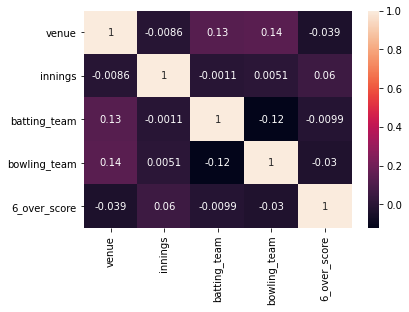

In [193]:
corr_mat = dfm_wo_outliers.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

In [194]:
X = encoded_df.drop('6_over_score',axis = 1)
y = encoded_df['6_over_score']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 65)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_lr = lin_reg.fit(X_train,y_train)
predictions = model_lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
precision_lr = mean_absolute_error(predictions,y_test)
r2_score_lr = r2_score(predictions,y_test)
print(precision_lr)

7.681517084867214


In [195]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu',kernel_initializer = 'he_uniform'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [196]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project_ipl',
    project_name='IPL')
tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project project_ipl\IPL\oracle.json
INFO:tensorflow:Reloading Tuner from project_ipl\IPL\tuner0.json
Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
un

In [197]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [198]:
tuner.results_summary()

Results summary
Results in project_ipl\IPL
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 416
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 7.531410217285156
Trial summary
Hyperparameters:
num_layers: 3
units_0: 128
units_1: 64
learning_rate: 0.001
units_2: 480
units_3: 288
units_4: 384
units_5: 224
Score: 7.7595321337382
Trial summary
Hyperparameters:
num_layers: 18
units_0: 384
units_1: 160
learning_rate: 0.01
units_2: 160
units_3: 480
units_4: 416
units_5: 256
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 8.46552578608195
Trial summary
Hyperparameters:
num_layers: 6
units_0: 192
units_1: 224
learning_rate: 0.01
units_2: 320
units_3: 96
units_4: 512
units_5: 480
Score: 9.634209950764975
Trial summary
Hyperparameters:
num_layers: 3
units_0: 160


In [231]:
from tensorflow import keras
model_nn = keras.Sequential([keras.layers.Dense(416,kernel_initializer = 'he_uniform',input_shape=(23,),activation = 'relu'),
                             keras.layers.Dense(96,kernel_initializer = 'he_uniform',activation = 'relu'),
                             keras.layers.Dense(32,kernel_initializer = 'he_uniform',activation = 'relu'),
                             keras.layers.Dense(32,kernel_initializer = 'he_uniform',activation = 'relu'),
                             keras.layers.Dense(32,kernel_initializer = 'he_uniform',activation = 'relu'),
                             keras.layers.Dense(32,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(1),
                            ])
from tensorflow.keras.callbacks import  EarlyStopping
es = EarlyStopping(patience=3,restore_best_weights= True)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_nn.compile(loss = 'mae',optimizer = adam)
history = model_nn.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 20,batch_size =60,callbacks = es)

Epoch 1/20
8/8 [==============================] - 2s 60ms/step - loss: 45.0986 - val_loss: 45.0339
Epoch 2/20
8/8 [==============================] - 0s 13ms/step - loss: 42.1045 - val_loss: 36.3466
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 29.7810 - val_loss: 15.1358
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 11.0861 - val_loss: 10.0160
Epoch 5/20
8/8 [==============================] - 0s 13ms/step - loss: 11.1630 - val_loss: 9.0995
Epoch 6/20
8/8 [==============================] - 0s 13ms/step - loss: 9.5750 - val_loss: 7.6256
Epoch 7/20
8/8 [==============================] - 0s 13ms/step - loss: 8.9241 - val_loss: 6.9882
Epoch 8/20
8/8 [==============================] - 0s 13ms/step - loss: 8.6046 - val_loss: 7.4302
Epoch 9/20
8/8 [==============================] - 0s 13ms/step - loss: 8.4124 - val_loss: 7.1279
Epoch 10/20
8/8 [==============================] - 0s 13ms/step - loss: 8.3879 - val_loss: 7.1702


In [232]:
predictions_nn = model_nn.predict(X_test)
precision_nn = mean_absolute_error(predictions_nn,y_test)
r2_score_nn = r2_score(predictions_nn,y_test)
print(precision_nn)

6.988186331356273


In [201]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score
R_reg = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
model_rr = GridSearchCV(R_reg,parameters,scoring='neg_mean_absolute_error',cv=5)
model_rr.fit(X_train,y_train)
print(model_rr.best_params_)
print(model_rr.best_score_)

{'alpha': 100}
-8.608976966185969


In [202]:
R_reg_ipl = Ridge(alpha= 100)
model_Rr= R_reg_ipl.fit(X_train,y_train)
predictions_Rr = model_Rr.predict(X_test)
r2_score_Rr = r2_score(predictions_Rr,y_test)
precision_Rr = mean_absolute_error(predictions_Rr,y_test)
print(precision_Rr)


7.352688832684317


In [234]:
print('The PRECISION in terms of Mean Absolute Error(MAE) between the actual and predicted score for different algothims are as follows:')
print("LINEAR_REGRESSION:",precision_lr)
print("RIDGE_REGRESSION:",precision_Rr)
print("ARTIFICIAL NEURAL NETWORK:",precision_nn)

The PRECISION in terms of Mean Absolute Error(MAE) between the actual and predicted score for different algothims are as follows:
LINEAR_REGRESSION: 7.681517084867214
RIDGE_REGRESSION: 7.352688832684317
ARTIFICIAL NEURAL NETWORK: 6.988186331356273


WHEN THE RIGHT WEIGHTS ARE SET, THE NEURAL NETWORK OUTPERFORMS BOTH LINEAR AND RIDGE REGRESSION.
THE LEAST MAE I GOT FROM THE ANN IS 6.988186331356273